In [1]:
# 1. Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Đọc dữ liệu
# Thay tên file chính xác của bạn vào đây
file_path = 'C:/Users/acer/OneDrive - Trường ĐH CNTT - University of Information Technology/NCKH/Machine Learning_Python/Data/diabetes.csv'
data = pd.read_csv(file_path)

In [3]:
# 3. Tách biến đầu vào (X) và biến mục tiêu (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data['Outcome']

In [4]:
# 4. Chia dữ liệu: 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 5. CHUẨN HÓA DỮ LIỆU (Standard Scaling)
# Bước này cực kỳ quan trọng giúp thuật toán hội tụ nhanh hơn (giống bước Scale 0-1 trong Excel nhưng tốt hơn)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 6. Huấn luyện mô hình Logistic Regression
# max_iter=1000 giúp đảm bảo mô hình chạy đủ số vòng lặp để tìm ra đáp án
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
# 7. Dự đoán
# Dự đoán nhãn (0 hoặc 1)
y_pred = model.predict(X_test_scaled)
# Dự đoán xác suất (Số % từ 0 đến 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [8]:
# 8. Hiển thị các hệ số (Beta) để so sánh với Excel
print("--- CÁC HỆ SỐ BETA TÌM ĐƯỢC ---")
print(f"Beta_0 (Bias/Intercept): {model.intercept_[0]:.4f}")
print("Các Beta trọng số:")
for col, coef in zip(feature_cols, model.coef_[0]):
    print(f" - {col}: {coef:.4f}")

--- CÁC HỆ SỐ BETA TÌM ĐƯỢC ---
Beta_0 (Bias/Intercept): -0.8861
Các Beta trọng số:
 - Pregnancies: 0.2126
 - Glucose: 1.0713
 - BloodPressure: -0.2478
 - SkinThickness: 0.0457
 - Insulin: -0.2008
 - BMI: 0.7782
 - DiabetesPedigreeFunction: 0.2306
 - Age: 0.4212


In [9]:
# 9. Đánh giá kết quả
print("\n--- KẾT QUẢ ĐÁNH GIÁ ---")
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {acc*100:.2f}%")

print("\nBáo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred))


--- KẾT QUẢ ĐÁNH GIÁ ---
Độ chính xác (Accuracy): 75.32%

Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



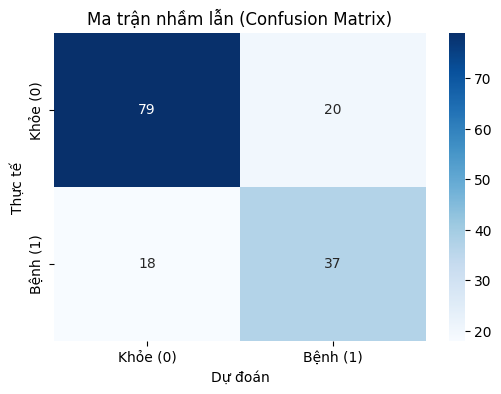

In [10]:
# 10. Vẽ Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Khỏe (0)', 'Bệnh (1)'], yticklabels=['Khỏe (0)', 'Bệnh (1)'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.show()